In [ ]:
from leicaautomator import find_spots
from leicaexperiment import Experiment
import numpy as np
experiment = Experiment('../master/data/experiment--whole')
labels, overlay, regions = find_spots(experiment)

Populating the interactive namespace from numpy and matplotlib


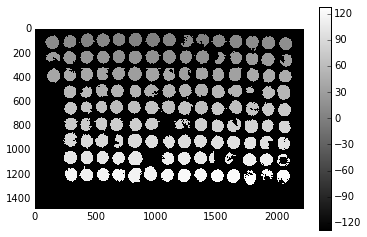

In [9]:
%pylab inline
from skimage import io
io.imshow(labels, cmap="gray")

In [3]:
next((r for r in regions if r.label == 0), 'NONE')

'NONE'

In [8]:
labels[labels == -1] = -128